# Analysis of Couples in _Pride and Prejudice_ : How Jane Austen Deliver Her Viewpoint on Marriage

## Catherine Yang

Aug 19th, 2019

Introduction to Computational Literary Analysis 

UC-Berkeley, Summer 2019 

Instructor: Jonathan Reeve

##### Introduction

Female writer Jane Austen's _Pride and Prejudice_ is probably the first romantic novel of manners that many people read. The novel weaves around five different couples based on the small town in England. The couples include: Mr. and Mrs. Bennet(parents of the Bennet family), Jane(oldest sister of the Bennet family) and Mr. Bingley(a rich man moving into the Netherfield neighbourhood), Elizabeth(second sister of the Bennet family) and Mr. Darcy(a wealthy and aristocratic friend of Mr. Bingley), Lydia(youngest sister of the Bennet family) and Mr. Wickham(Son of Mr. Darcy's family steward), and Charlotte(friend of the Bennet sisters) and Mr. Collins(a clergyman and cousin of the Bennet sisters).

Although Elizabeth and Mr. Darcy are the protagonists, and their love story occupies the main plot, the book is indeed shaped by the five couples together. The five couples have different reasons of marriage and different concepts of love. They together introduce readers to how marraiges might be like, and showcases Jane Austen's own view on marriage. Although money and social status are important factors, Austen would not be satisfied with a marraige without mutual love and respect. To her, mutual understanding and emotions are the fundamentals that she would not live without (Pei). This project thus looks into how Austen write the novel, to analyze how her viewpoint on marriage is delivered through structure and word choice.


In [1]:
import nltk
from nltk.text import Text
import collections
import networkx as nx
import spacy
from itertools import combinations
from collections import Counter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

%matplotlib inline

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
pride = open("pride.txt").read().lower()

In [4]:
# a function that filters different names into standardized format
def substituteName(text):
    for name in ["miss bingley"]:
        text = text.replace(name, " missbingley ")
    for name in ["miss darcy"]:
        text = text.replace(name, " missdarcy ")
    for name in ["elizabeth", "eliza", "lizzy", "elizabeth bennet"]:
        if name in text: 
            text = text.replace(name, ' elizabeth ')
    for name in ["darcy", "fitzwilliam", "fitzwilliam darcy", "mr. darcy"]:
        if name in text: 
            text = text.replace(name, " mdarcy ")
    for name in ["jane", "miss bennet", "jane bennet"]:
        if name in text: 
            text = text.replace(name, " jane ")
    for name in ["mr. bingley", "charles", "charles bingley", "bingley"]:
        if name in text: 
            text = text.replace(name, " mbingley ")
    for name in ["lydia", "lydia bennet"]:
        if name in text: 
            text = text.replace(name, " lydia ")
    for name in ["mr. wickham", "wickham", "george", "george wickham"]:
        if name in text: 
            text = text.replace(name, " mwickham ")
    for name in ["miss lucas", "charlotte", "charlotte lucas"]:
        if name in text: 
            text = text.replace(name, " charlotte ")
    for name in ["mr. collins", "william", "collins", "william collins"]:
        if name in text: 
            text = text.replace(name, " mcollins ")
    for name in ["mr. bennet"]:
        if name in text: 
            text = text.replace(name, " mbennet ")
    for name in ["mrs. bennet"]:
        if name in text: 
            text = text.replace(name, " mrsbennet ")
    return text

In [5]:
#create a str of the book with substituted names
prides = substituteName(pride)

In [6]:
#tokenize it
prideToken = nltk.word_tokenize(prides)

In [7]:
#create a Text file
prideText = Text(prideToken)

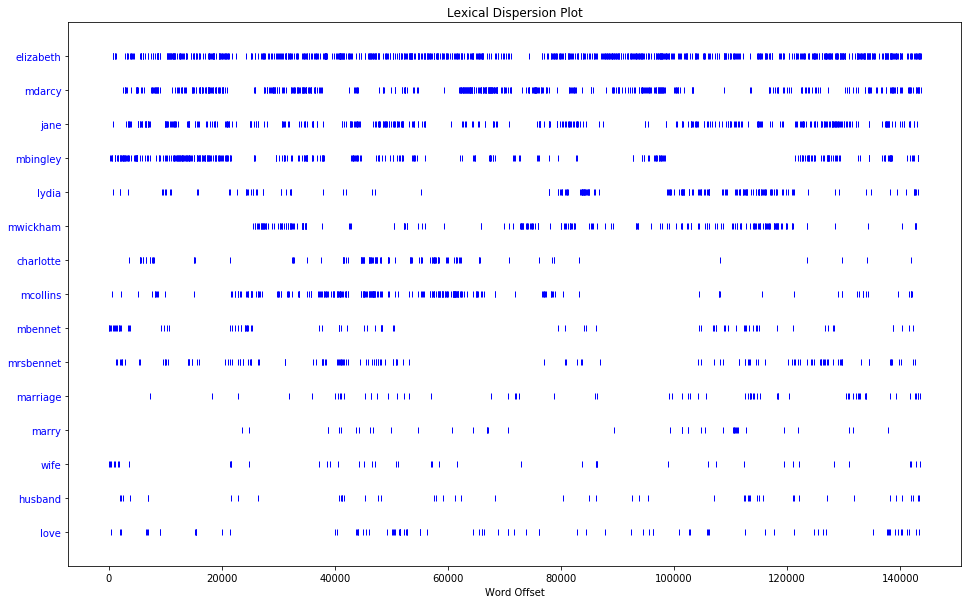

In [8]:
#draw the dispersion plot of key characters and concepts
namelist = ["elizabeth", "mdarcy", "jane", "mbingley", "lydia", "mwickham", "charlotte", "mcollins", "mbennet", "mrsbennet", "marriage", "marry", "wife", "husband","love"]
plt.figure(1, figsize=(16, 10))
prideText.dispersion_plot(namelist)
plt.show()

##### Optional Discovery: The Hidden Importance of Mr. Collins
From the above dispersion plot we can recognize the occurance of characters, and thus infer possible relationship between characters. The first and foremost information this plot gives is the importance of characters. Elizabeth, the character that appears in a high frequency through out the novel, is for sure the most important character. Mr. Darcy follows up to be the second. The two characters, however, do not always appear in the same section of word offset, suggesting that the two characters do not always appear together, but might have their own seperate stories. Jane and Mr. bingley also appear in a high frequency, but their timeline of occurancce suggests a different story.

The comparison between different characters' and phrases' occurances thus indicates when do difference characters appear together and when are they seperate. In the first 70000 words, the dispersions of Mr. Darcy, Mr. Bingley and Jane appear to have a similar pattern. They all have gaps somewhere between 20000-25000, 35000-42000, 43000-48000, and 55000 to 65000. Interestingly, all these time periods where these three don't appear, are times when Mr. Collins' name appear very frequently. This is quite surprising since jane is indeed not always with Mr. Darcy and Mr. Bingley at those times. This possibly shows Mrs. Bennet's effort to make Jane marry Mr. Bingley in two ways: 1. their name dispersion appears in a similar pattern, indicating an effort to link Jane to Mr. Bingley and Mr. Darcy; 2. Jane's name disappears when Mr. Collins appears, showing a second effort to avoid linking Jane and Mr. Collins together. I doubt if describing this as a result of Mrs. Bennet's effort is proper or not, since I wonder if this actually reflects an authorial intention. Either intentionally or unintentionally, the author seems to seperate Jane and Mr. Collins as much as possible even though both are important characters that have a lot of connections to each other.

This thus brings to my attention, how Mr. Collins, a seemingly marginalized character(marginalized in terms of his relationship to other characters in the chart, since no one is really his companion), indeed plays an essential role in other characters' stories. His initial intention to marry Jane alerts Mrs. Bennet to hide Jane away and put Elizabeth to stage, while his second intention to marry Elizabeth pushes the protagonist to re-confirm her insistance of marrying someone who is mutually respectful. His stiff concept in marriage and love forms a clear contrast to the marriage of the Bennet sisters, whom try for a marriage of love. Through such arrangement, Austen thus differentiates Mr. Collins from others, especially from the loving couple Jane and Mr. Bingley. The structure of the novel thus reflects Austen's effort to emphasize the difference between relatively ideal and less ideal couples.

##### The Stair-like Pattern in The Plot

The dispersion plot is arranged based on marriage times of the five couples, of which the bottom couple marries the earliest and the top couple the latest. Audience may recognize couples as well as their time of marriage by observing the occurances of names. Whenever two people in a couple occurs frequently together, the two must be closely correlated to each other in this time period. The time when the two appear most frequently together, might be the time when they get married. 

This can be proved through close reading as well. Mr. and Mrs. Bennet's dispersion plot share a similar pattern, indicating their relationship as a couple. Their names appear the most frequently in the first 5000 words, and afterwards give way to Charlotte and Mr. Collins. The second couple get married at around 45000 words(chapter 22), and appears quite frequently together till 65000. Lydia and Wickham follows up to appear quite frequently together as the previous couple quiet down from the story. They start frequently appearing together since 100000, and get married at approximately 120000(chapter 49). Then goes Jane and Mr. Bingley, and then at last comes Elizabeth and Mr. Darcy.

To apply a little more imagination to the plot, one may even see a stair-like pattern: the bottom step goes Mr. and Mrs. Bennet, the second step goes Charlotte and Mr. Collins, the third step goes Lydia and Mr. Wickham, the fourth step goes Jane and Mr. Bingley, and the highest step is Elizabeth and Mr. Darcy. 

This pattern does not come out of coincidence. It shows how Jane Austen delicately arranged the interplays between different couples to weave around her center point on marraige. It appears both chronological and hierarchical in terms of how close each couple is to Austen's own viewpoint on marraige. Mr. and Mrs. Bennet, who are marriaged before the narrative starts, appears the lowest in this hierarchy. They barely have any mutual understanding, and does not appear as a loving or respectful couple. Charlotte and Mr. Collins go the next. Their marraige is purely based on the need of marriage. Charlotte needs a husband who can sustain her living, while Mr. Collins is in need of a wife who obeys his words and would behave properly as a clergyman's wife. There is no love or understanding between Charlotte and Mr. Collins. The fact that Elizabeth rejected Mr. Collins' proposal of marriage showcases Austen's view on the couple. They do not fit into the author's expectation of marraige: After being rejected by Elizabeth, Mr. Collins offers another proposal of marraige to Charlotte so quickly that there is no possibility of having any love between them. He makes it very clear that he simply needs a proper wife and can supply her with a comfortable living. Charlotte, clearly knowing how Mr. Collins is like, still sees him as an ideal husband. Describing Mr. Collins and Charlotte as such, Austen thus place them as one of the least wanted marriages following Mr. and Mrs. Bennet. 

Lydia and Wickham follows up to be the third least wanted couple. The couple more or less has some emotions or loving envolved, which makes them ranking higher than that of Charlotte and Mr. Collins. However, the marriage, at least to Mr. Wickham, is still very need based. He requires benefits from the Bennet family and Mr. Darcy in order to marry Lydia, showing that his reason of marriage is not because of love or understanding, but financial concerns. Higher up goes Jane and Mr. Bingley, which is a respectful and loving couple, but lacks a bit intellectual thoughts. The top goes Elizabeth and Mr. Darcy. This couple is almost the most ideal marriage based on Austen's standard. They both have their own opinions, and they respect and learn from each others' thoughts through communication. They thus form a mutual understanding which makes them wanting to marry and live a happy life together.

The pattern also shows more than just a hierarchical structure. It also shows that: if two people in a couple appears together for a long time before their marriage, it is more likely for the couple to have a mutual understanding and rank higher. For instance, before their marriage, Charlotte and Mr. Collins do not appear much together. Their marriage rather comes all of a sudden. Such a quick marriage would barely be a result of love, but rather a comrpomise to each other. Lydia and Wickham also has the same problem. Before their marriage, they do not appear frequently together as well. One may as well conjecture that their marriage is also quite in a hurry, which deviates from an ideal route. In compare, for both Jane and Elizabeth, their names appear quite frequently together with their husband for a long time before marriage. This indicates that they have know their husband for a considerable amount of time before they get married. They thus have a higher possibility of forming mutual loving and understanding with their other half, making their marriage a more wanted one.












In [9]:
#split the text into paragraphs
pridePara = prides.split("\n\n")

In [10]:
#prep for network plot
names = ["elizabeth", "mdarcy", "jane", "mbingley", "lydia", "mwickham", "charlotte", "mcollins", "mbennet", "mrsbennet","love","wife","husband","family"]#"wife","husband"
combs = list(combinations(names, 2))
counter = {comb: 0 for comb in combs}
for para in pridePara: 
    for comb in combs: 
        if comb[0] in para and comb[1] in para: 
            counter[comb] += 1

In [11]:
namesTuples = [(pair[0], pair[1], n) 
               for pair, n in counter.items()]

In [12]:
socialGraph = nx.Graph()

In [13]:
socialGraph.add_nodes_from(names)

In [14]:
socialGraph.add_weighted_edges_from(namesTuples)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


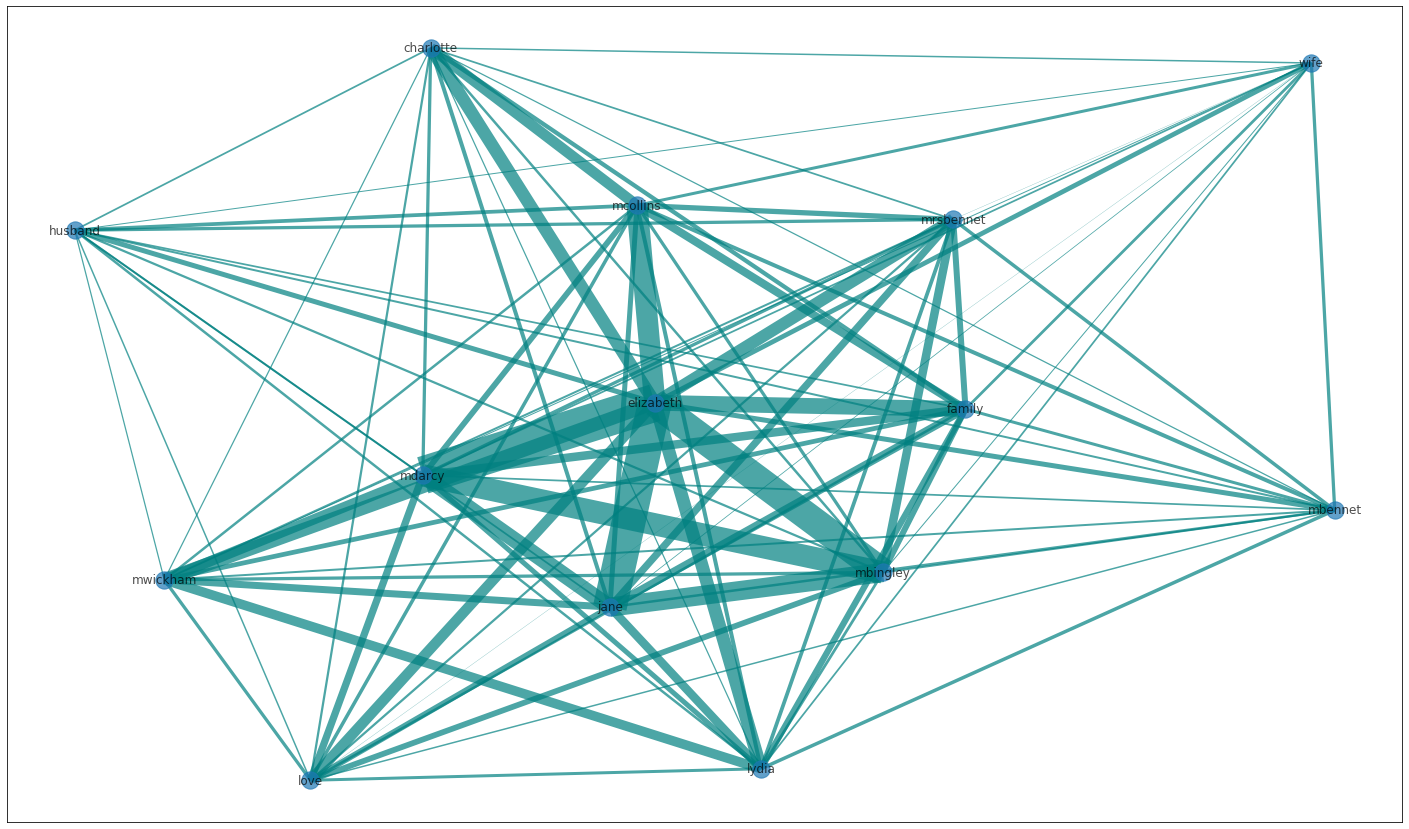

In [15]:
#draw network plot
weightsOnly = [t[2]/4 for t in namesTuples]
plt.figure(1, figsize=(25, 15))
nx.draw_networkx(socialGraph, 
                 width=weightsOnly,
                 alpha=0.7, edge_color='teal')
plt.show()

##### The Secondary Meaning of Words

Besides the delicate arrangement of structure, Austen also delivers her idea through her word choice. The network plot above shows how certain concepts/words and characters are related. The thicker the line, the more time these words have appear in the same paragraph, the closer the relationship. In this project I looked specifically into words "husband," "wife," and "love" to analyze the secondary meaning/indication behind them.

Since Elizabth is the protagonist and all words/characters linked quite closely to her, the analysis will exclude her to check the relationship between words and other characters. The word "husband" links relatively stronger with Mr. Collins and Mrs. Bennet. Both share a same feature: their marriage is very much need based. This thus indicates "husband" is a functional word. It stands more for one's role as a husband rather than how a husband loves his wife and family. The word "wife" are in a similar situation: It links relatively stronger to Mr. Collins and Mr. Bennet. Again both's marriage is not ideal, showing that "wife" represents the function of a wife more than a loving position that it occupies. The word "love" appears quite differently. It is relatively strongly linked to Mr. Darcy, Jane, and Mr. Bingley. These character's marriage are all quite ideal. The difference in relationship between "husband" & "wife" VS. "love" shows how the concept of husband and wife deviates from the concept of love. To become a husband or wife does not necenssarily mean to love. 

In [16]:
prideText.concordance("wife", lines = 45)

Displaying 45 of 45 matches:
 good fortune , must be in want of a wife . however little known the feelings 
 know who has taken it ? ” cried his wife impatiently . “ _you_ want to tell m
 ” “ my dear mbennet , ” replied his wife , “ how can you be so tiresome ! you
rs had been insufficient to make his wife understand his character . _her_ min
ough to the last always assuring his wife that he should not go ; and till the
 am sick of m mbingley , ” cried his wife . “ i am sorry to hear _that_ ; but 
 , fatigued with the raptures of his wife . “ what an excellent father you hav
tions . he had rather hoped that his wife ’ s views on the stranger would be d
pe , my dear , ” said mbennet to his wife , as they were at breakfast the next
e of being eagerly questioned by his wife and his five daughters at once . aft
ases. ” “ oh ! my dear , ” cried his wife , “ i can not bear to hear that ment
n with the longbourn family he had a wife in view , as he meant to choose one 
sed than mbennet himsel

In [17]:
prideText.concordance("husband", lines = 100)

Displaying 50 of 50 matches:
t , was sufficient to draw from her husband any satisfactory description of m m
therfield , ” said mrsbennet to her husband , “ and all the others equally well
 m mbingley , his two sisters , the husband of the eldest , and another young m
y compassion for _me_ , ” cried her husband impatiently , “ he would not have d
 if i were determined to get a rich husband , or any husband , i dare say i sho
ined to get a rich husband , or any husband , i dare say i should adopt it . bu
it is _not_ m mbingley , ” said her husband ; “ it is a person whom i never saw
e of composure which astonished her husband and daughters . m mcollins was punc
and their aunt promised to make her husband call on mr. mwickham , and give him
ply , but hurrying instantly to her husband , called out as she entered the lib
 who had persuaded herself that her husband regarded the affair as she wished ,
ng him. ” “ my dear , ” replied her husband , “ i have two small favours to req
 spite of h

##### Context of Words Further Explain Their Secondary Meaning

For words "husband" and "wife," they have a clear pattern of appearing in terms of "her husband" and "his wife." This showcase how husband and wife are not singular concepts. Their meaning comes from their counter parts: a husband must be someone's husband and a wife must be someone's wife, people do not say "I am a husband." A husband or wife occupies no meaning without their importance to somenone else's life. 

But when would one character be described as someone else's wife ir husband instead of standing by their own? Two answers might explain: 1. the character got married and is thus referred to as the wife or husband of their mate. 2. the character's importance as an individual is not as important as his/her importance as a husband or wife. By referring to someone as someone else's husband or wife, Austen reduces the importance and meaning of this character to one's identity to one's mate. Would she do this to the important character with intellectual thoughts? Probably no. Elizabeth will always stand as Elizabeth, becoming Mr. Darcy's wife adds up to her identity as an individual, but surely would not take over or substitute it. The case is different for Charlotte. When she becomes Mr. Collins' wife, she reduces or reshapes her identity to the wife of Mr. Collins, who will take up all the responsibility of being a proper wife. While Elizabeth defines the concept Mr. Darcy's wife, Charlotte is defined by the concept Mr. Collins' wife. Her importance and complexity as an individual is merely reduced to her identity as a clergyman's wife.

This also corresponds to the structure and word choice that the project previously discussed. The more one is defined by the concept husband or wife, the less individuality one owns, the less likely one and one's mate would appear high in the structure hierarchy. The more one is linked to the word husband or wife, the more one appears in terms of "his husband" or "her wife," the less ideal the marriage would appear based on Austen's expectation.

##### Conclusion:

A novel is a work of delicacy, and barely would anything appear out of coincidence. Rather, all that have been rendered to readers are of concious choice of the author. Through looking into the structure and word choice of Jane Austen's _Pride and Prejudice_, this project thus explains how Austen deliver her viewpoint on marriage throughout the narrative. Austen constructs a chronological and hierarchical structure of the five couples, indicating her rank of different couples. The higher the rank, the closer the couple is to her expectation of an ideal marriage. She also delicately uses words "husband" and "wife": the more one character links to these words, the less likely one's marriage is ideal. Such structure and word choice are exquisite works of Austen in order to shape her viewpoint on how an ideal marriage should be. 

#### Work Cited:

Pei, F. , Fu, C. and Huang, X. (2014) Jane Austen’s Views on Marriage in Pride and Prejudice. Advances in Literary Study, 2, 147-150. doi: 10.4236/als.2014.24023.